In [44]:
# Import the required libraries and dependencies
import pandas as pd
import holoviews as hv
from fbprophet import Prophet
import hvplot.pandas
import datetime as dt
from pathlib import Path
import numpy as np
%matplotlib inline

google_hourly = Path("../Resources/google_hourly_search_trends.csv")
df_mercado_trends = pd.read_csv(google_hourly, index_col = 'Date', 
                                parse_dates=True, infer_datetime_format=True)

display(df_mercado_trends.head())
display(df_mercado_trends.tail())



,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [70]:
# Slice the DataFrame to just the month of May 2020
df_may_2020 =df_mercado_trends.loc["2020-05-01":"2020-05-31"]
display(df_may_2020.head())
display(df_may_2020.tail())

,Search Trends
Date,
2020-05-01 00:00:00,80
2020-05-01 01:00:00,80
2020-05-01 02:00:00,76
2020-05-01 03:00:00,66
2020-05-01 04:00:00,53


,Search Trends
Date,
2020-05-31 19:00:00,59
2020-05-31 20:00:00,64
2020-05-31 21:00:00,76
2020-05-31 22:00:00,90
2020-05-31 23:00:00,96


In [23]:
# Use hvPlot to visualize the data for May 2020
df_may_2020.hvplot()

:Curve   [Date]   (Search Trends)

In [24]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_may_2020.sum()

# View the traffic_may_2020 value
traffic_may_2020

Search Trends    38181
dtype: int64

In [30]:

# Calcluate the monhtly median search traffic across all months 
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.groupby(by=[df_mercado_trends.index.year, df_mercado_trends.index.month]).sum().median()

median_monthly_traffic
# View the median_monthly_traffic value



Search Trends    35172.5
dtype: float64

In [31]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic

Search Trends    1.085536
dtype: float64

In [36]:
# Group the hourly search data to plot (use hvPlot) the average traffic by the day of week 
df_mercado_trends.groupby(by=[df_mercado_trends.index.dayofweek]).mean().hvplot()

:Curve   [Date]   (Search Trends)

In [47]:
# Use hvPlot to visualize the hour of the day and day of week search traffic as a heatmap.
df_mercado_trends.hvplot.heatmap(x='index.hour', y='index.dayofweek', C= 'Search Trends', cmap='reds').aggregate(function=np.mean)

:HeatMap   [index.hour,index.dayofweek]   (Search Trends)

In [52]:
# Group the hourly search data to plot (use hvPlot) the average traffic by the week of the year
df_mercado_trends.groupby(by=[df_mercado_trends.index.week]).sum().hvplot()

C:\Users\Klin\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


:Curve   [Date]   (Search Trends)

In [57]:
mercado_stock = Path("../Resources/mercado_stock_price.csv")
df_mercado_stock = pd.read_csv(mercado_stock, index_col = 'date', 
                                parse_dates=True, infer_datetime_format=True).dropna()
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


In [58]:
# Use hvPlot to visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.hvplot()

:Curve   [date]   (close)

In [60]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
mercado_stock_trends_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1).dropna()

# View the first and last five rows of the DataFrame
mercado_stock_trends_df.head()

,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


In [73]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06) 
first_half_2020 = mercado_stock_trends_df["2020-01":"2020-06"]

# View the first and last five rows of first_half_2020 DataFrame
display(first_half_2020.head())

,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


In [88]:
# Use hvPlot to visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `hvplot(shared_axes=False, subplots=True).cols(1)`
mercado_stock_trends_df.hvplot(x='index', y=['close', 'Search Trends'], shared_axes=False, subplots=True).cols(1)


:NdLayout   [Variable]
   :Curve   [index]   (value)

In [92]:

# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df['Search Trends'].shift(1)


# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df['close'].pct_change().rolling(window=4).std()


# Use hvPlot to visualize the stock volatility
mercado_stock_trends_df['Stock Volatility'].hvplot()



:Curve   [index]   (Stock Volatility)

In [94]:

# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df['close'].pct_change()


# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(mercado_stock_trends_df.head())
display(mercado_stock_trends_df.tail())

# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00,136.56,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00,136.42,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00,136.10,40.0,33.0,0.006134,-0.002346


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,0.013566,0.010678


,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


In [102]:
# Step 4: Create a Time Series Model with Prophet

# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df.columns = ['ds','y']


# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df = mercado_prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(mercado_prophet_df.head())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


In [103]:

# Call the Prophet function, store as an object
model_mercado_trends = Prophet()


In [105]:
# Fit the time-series model.
model_mercado_trends.fit(mercado_prophet_df)

In [110]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000, freq = 'H')

# View the last five rows of the future_mercado_trends DataFrame
display(future_mercado_trends.tail())

,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [112]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model_mercado_trends.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.178720,81.268966,97.959513,44.178720,44.178720,45.370479,45.370479,45.370479,41.452658,...,1.860213,1.860213,1.860213,2.057608,2.057608,2.057608,0.0,0.0,0.0,89.549200
1,2016-06-01 01:00:00,44.179783,77.639209,94.933875,44.179783,44.179783,41.816276,41.816276,41.816276,37.943467,...,1.810132,1.810132,1.810132,2.062676,2.062676,2.062676,0.0,0.0,0.0,85.996059
2,2016-06-01 02:00:00,44.180845,67.547681,83.978112,44.180845,44.180845,31.492797,31.492797,31.492797,27.656524,...,1.768560,1.768560,1.768560,2.067713,2.067713,2.067713,0.0,0.0,0.0,75.673642
3,2016-06-01 03:00:00,44.181908,52.351394,68.236967,44.181908,44.181908,16.225604,16.225604,16.225604,12.417296,...,1.735591,1.735591,1.735591,2.072718,2.072718,2.072718,0.0,0.0,0.0,60.407512
4,2016-06-01 04:00:00,44.182970,35.131151,51.602500,44.182970,44.182970,-0.889236,-0.889236,-0.889236,-4.678106,...,1.711179,1.711179,1.711179,2.077691,2.077691,2.077691,0.0,0.0,0.0,43.293734


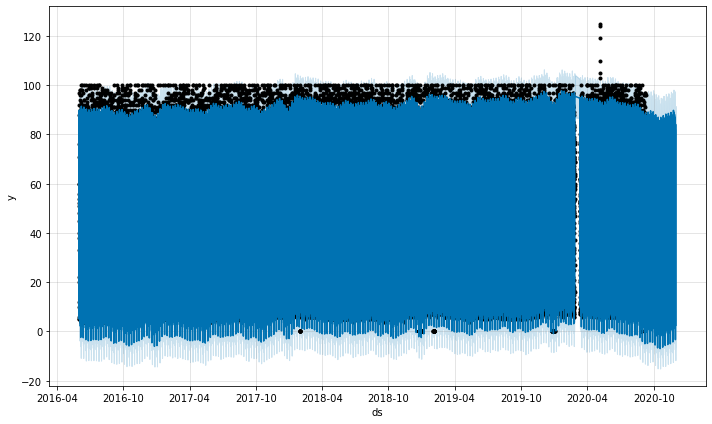

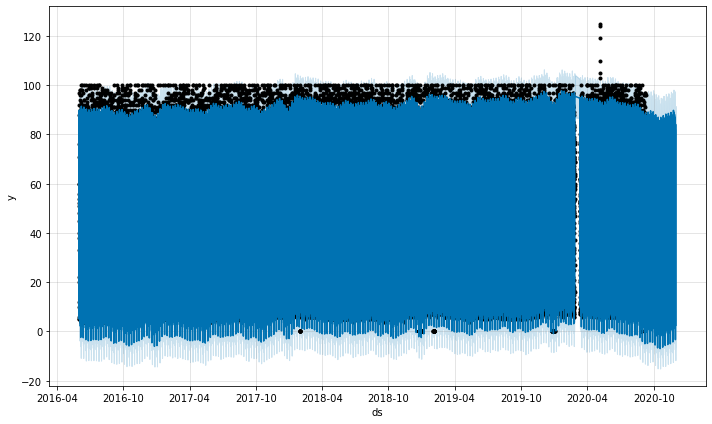

In [113]:
# Plot the Prophet predictions for the Mercado trends data
model_mercado_trends.plot(forecast_mercado_trends)

In [114]:
# Question: How's the near-term forecast for the popularity of MercadoLibre?
# ANSWER : it looks like the there will be a dip in search trend for the next 80 days


# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends = forecast_mercado_trends.set_index('ds')

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends[['yhat','yhat_lower','yhat_upper']].head()

,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.549200,81.268966,97.959513
2016-06-01 01:00:00,85.996059,77.639209,94.933875
2016-06-01 02:00:00,75.673642,67.547681,83.978112
2016-06-01 03:00:00,60.407512,52.351394,68.236967
2016-06-01 04:00:00,43.293734,35.131151,51.602500


In [115]:
# From the forecast_mercado_trends DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours 
forecast_mercado_trends[['yhat','yhat_lower','yhat_upper']].iloc[-2000:,:].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

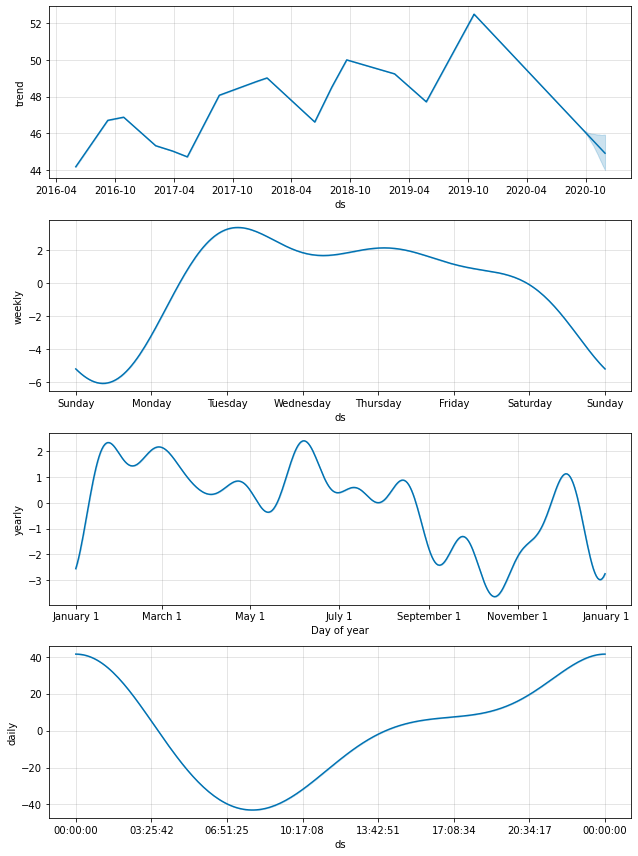

In [116]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame 
figures_mercado_trends = model_mercado_trends.plot_components(forecast_mercado_trends)

In [117]:
Question: What time of day exhibits the greatest popularity?

Answer: the model suggest that late hour midnight 12am tend to be most popular.

Question: Which day of week gets the most search traffic?

Answer: the model suggest that during the week Tuesday tend to be most popular.

Question: What's the lowest point for search traffic in the calendar year?

Answer: the model suggest that mid October and end of year tend to be lowest in traffic. this may be caused by the holidays period. 

SyntaxError: invalid syntax (1596674921.py, line 3)